# Lab 1 - Synthetic data generation

This lab is about the generation of synthetic data.

How to generate this data depends on the learning task: **classification** or **regression**.

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib as cm
import matplotlib.pyplot as plt
import os

## Generating data for regression problems

Let's define a function to generate a D-dimensional dataset according to a linear regression problem, possibly affected by Gaussian noise.
The use of the function is the following:

```
X, Y = linearRegrFunction(n, d, low_d, high_d, w, sigma_noise)
```

where
- **n** is the number of samples to be generated
- **d** is the size of each sample
- **low_d** and **high_d** are arrays of, respectively, lower and upper bounds for the domain of the samples
- **w** is an array with the linear function coefficients
- **sigma_noise** is the standard deviation used to generate the Gaussian noise (with zero mean)
- **X**, **Y**: d-dimensional samples (X) associated with 1-dimensional output (Y)


In [2]:
def linearRegrFunction(n, d, low_d, high_d, w, sigma_noise):
   
    X = np.zeros((n, d))
    for i in range(0, d):
        X[:,i] = np.random.uniform(low_d[i], high_d[i], size=n)
    
    gauss_noise = np.random.normal(0, sigma_noise, size=(n, 1))

    Y = np.dot(X, w) + gauss_noise
    
    return X, Y

### Play with the data generator

To start, generate a dataset of 1-dimensional input, for different values of `w` and no noise. <br> Pick the bounds of the domain that you prefer. 
<br> Let's consider the function `Y = wX` with `w=1` (the identity function), and then change the value of `w` as you prefer

**Notice that since no noise is added, the obtained samples refer to the TRUE function**

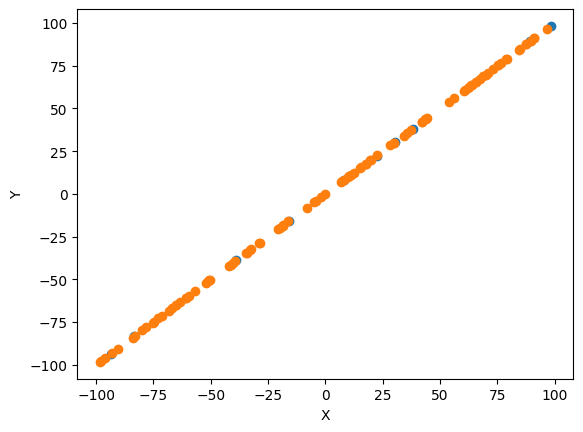

In [4]:
d = 1
w = np.array([1]).reshape(-1, d).T
low_d = np.array([-100])
high_d = np.array([100])

n = 10 
X, Y = linearRegrFunction(n, d, low_d, high_d, w, 0)


plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")

# TRY WITH FURTHER SAMPLINGS, VISUALIZE THE OBTAINED POINTS ON THE SAME PLOT AND OBSERVE WHAT HAPPENS
X1, Y1 = linearRegrFunction(100, d, low_d, high_d, w, 0)
plt.scatter(X1, Y1)
# WHAT HAPPENS WHEN YOU CHANGE THE AMOUNT OF POINTS?

### Time to add noise

- Still considering the 1-dimensional case, fix the linear coefficients, the bounds, the number of samples and the amount of noise (e.g. `sigma_noise=3`) and generate multiple instances of the data.
- Plot them together and observe the relationship between the different samples sets.
- Also, generate the "TRUE" function and plot its samples as well. 

**Hint:** A sensible amount of noise depends on the `low_d` and `high_d` bounds!

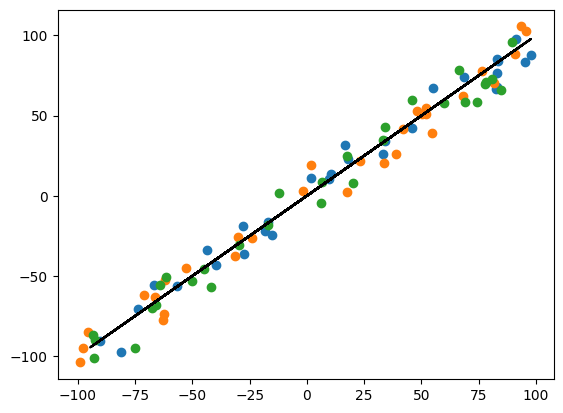

In [5]:
D = 1
w = np.array([1]).reshape(-1, D).transpose()
low_D = np.array([-100])
high_D = np.array([100])

n = 30 
sigma_noise = 10

Xtrue, Ytrue = linearRegrFunction(100, D, low_D, high_D, w, 0)
plt.plot(Xtrue, Ytrue,'-k')

# GENERATE 4 DIFFERENT INSTANCES OF THE DATA KEEPING ALL THE PARAMETERS WITH THE SAME VALUE
X1, Y1 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise)
# VISUALIZE THE OBTAINED POINTS ON THE SAME PLOT AND OBSERVE WHAT HAPPENS
plt.scatter(X1, Y1)

Xd1, Yd1 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise)
plt.scatter(Xd1, Yd1)

Xd2, Yd2 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise)
plt.scatter(Xd2, Yd2)

### Change the amount of noise 

- Again on the 1-dimensional case, fix the parameters of the function, the bounds, the number of samples and compare the data obtained according to different amount of noise. <br>
- Plot them together and observe the relationship between the different samples sets. <br>
- Observe the difference as you change also the number of samples
- Also, generate the "TRUE" function and plot its samples as well. 

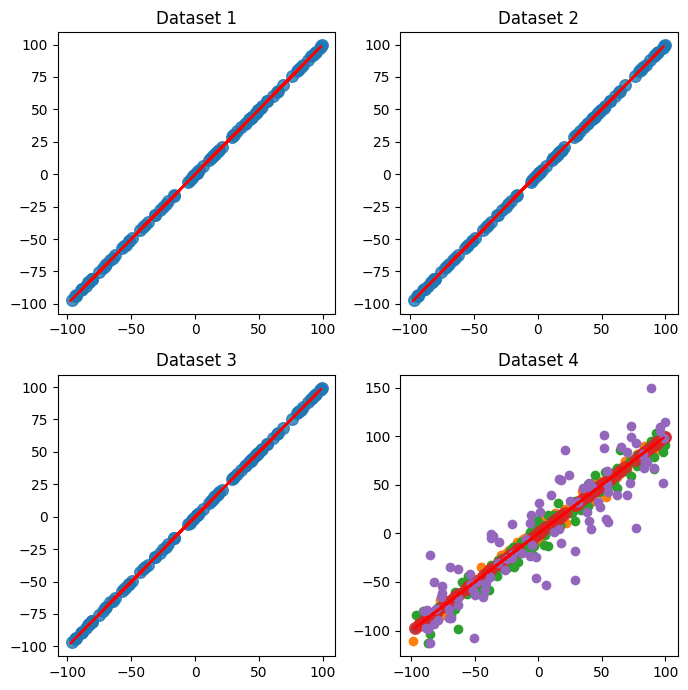

In [23]:
n = 100
D = 1
w = np.array([1]).reshape(-1, D).transpose()

low_D = np.array([-100])
high_D = np.array([100])

# Here we can compute the true function
Xtrue, Ytrue = linearRegrFunction(100, D, low_D, high_D, w, 0)

# Setup a plot in which the different sets can be shown and visually compared
fig = plt.figure(figsize=(7,7)) 
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

Xd1, Yd1 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise=0.1)
ax0.scatter(Xd1, Yd1, s=70, alpha=0.8)
ax0.plot(Xtrue, Ytrue, c='r')
ax0.set_title("Dataset 1")

# GENERATE 3 FURTHER INSTANCES OF THE DATA KEEPING THE SAME VALUE FOR ALL THE PARAMETERS BUT THE NOISE LEVEL
# DATASET Xd2, Yd2 WITH sigma_noise = 5
# DATASET Xd3, Yd3 WITH sigma_noise = 10
# DATASET Xd4, Yd4 WITH sigma_noise = 25
# VISUALIZE THE OBTAINED POINTS ON DIFFERENT SUBPLOTS
# Fill here...

plt.scatter(Xd1, Yd1)

Xd2, Yd2 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise=5)
ax1.scatter(Xd1, Yd1, s=70, alpha=0.8)
ax1.plot(Xtrue, Ytrue, c='r')
ax1.set_title("Dataset 2")
plt.scatter(Xd2, Yd2)

Xd3, Yd3 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise=10)
ax2.scatter(Xd1, Yd1, s=70, alpha=0.8)
ax2.plot(Xtrue, Ytrue, c='r')
ax2.set_title("Dataset 3")
plt.scatter(Xd3, Yd3)

Xd4, Yd4 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise=25)
ax3.scatter(Xd1, Yd1, s=70, alpha=0.8)
ax3.plot(Xtrue, Ytrue, c='r')
ax3.set_title("Dataset 4")
plt.scatter(Xd4, Yd4)

fig.tight_layout()

### Increasing the sample size 

- Let us consider a sample set with 2D input and 1D output, fix the parameters of the function, the bounds, the number of samples and compare the data obtained according to different amount of noise.
- Plot them together and observe the relationship between the different samples sets.
- Observe the difference as you change also the number of samples
- Also, generate the "TRUE" function and plot its samples as well. 

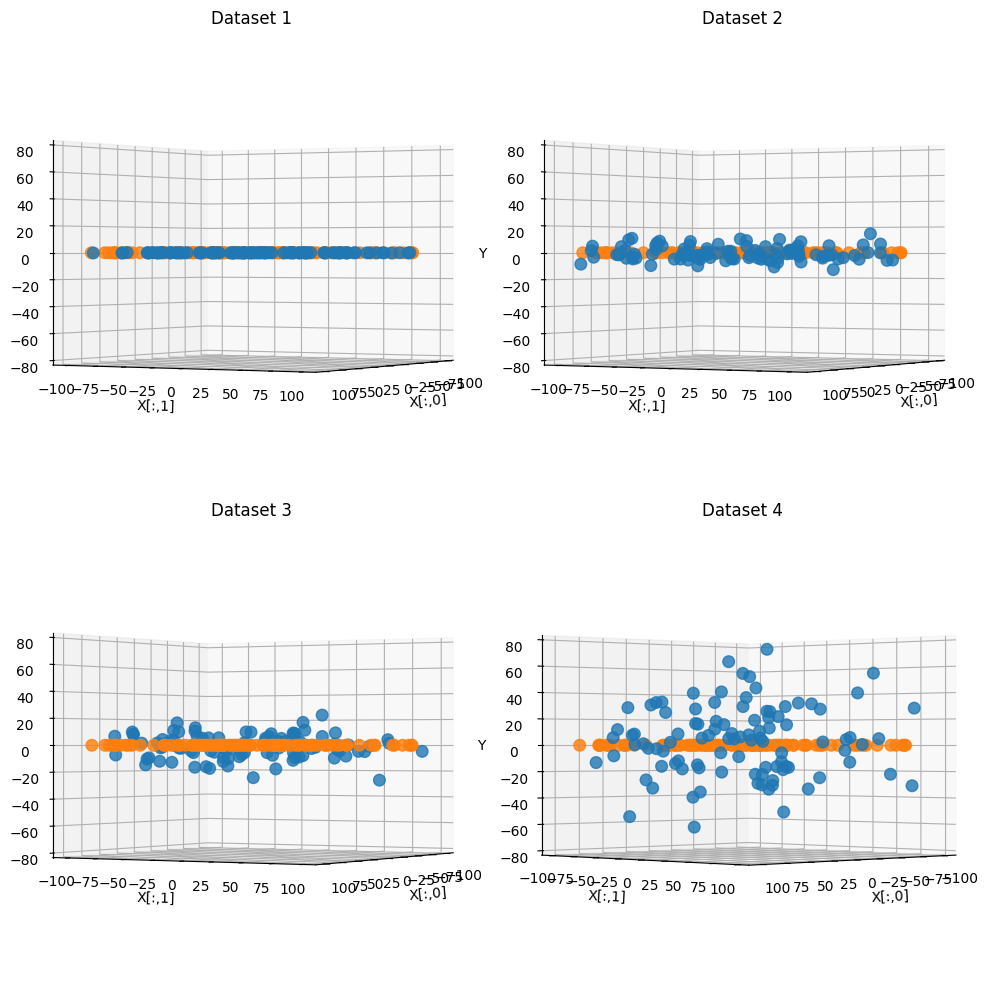

In [24]:
from mpl_toolkits.mplot3d import Axes3D

n = 100
D = 2
w = np.array([0, 0]).reshape(-1, D).transpose()

low_D = np.array([-100, -100])
high_D = np.array([100, 100])

# Here we can compute the true function
Xtrue, Ytrue = linearRegrFunction(n, D, low_D, high_D, w, 0)

# Setup a plot in which the different sets can be shown and visually compared
fig = plt.figure(figsize=(10,10)) 
ax0 = fig.add_subplot(2, 2, 1, projection='3d')
ax1 = fig.add_subplot(2, 2, 2, projection='3d')
ax2 = fig.add_subplot(2, 2, 3, projection='3d')
ax3 = fig.add_subplot(2, 2, 4, projection='3d')

Xd1, Yd1 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise=0.1)
ax0.scatter3D(Xd1[:,0], Xd1[:,1], Yd1, s=70, alpha=0.8)
ax0.scatter3D(Xtrue[:,0], Xtrue[:,1], Ytrue, s=70, alpha=0.8)
ax0.set_title("Dataset 1")
ax0.view_init(azim=30,elev=0)
ax0.set_xlabel('X[:,0]')
ax0.set_ylabel('X[:,1]')
ax0.set_zlabel('Y')
ax0.set_zlim([-80,80])

Xd2, Yd2 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise=5)
ax1.scatter3D(Xd2[:,0], Xd2[:,1], Yd2, s=70, alpha=0.8)
ax1.scatter3D(Xtrue[:,0], Xtrue[:,1], Ytrue, s=70, alpha=0.8)
ax1.set_title("Dataset 2")
ax1.view_init(azim=30,elev=0)
ax1.set_xlabel('X[:,0]')
ax1.set_ylabel('X[:,1]')
ax1.set_zlabel('Y')
ax1.set_zlim([-80,80])

Xd3, Yd3 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise=10)
ax2.scatter3D(Xd3[:,0], Xd3[:,1], Yd3, s=70, alpha=0.8)
ax2.scatter3D(Xtrue[:,0], Xtrue[:,1], Ytrue, s=70, alpha=0.8)
ax2.set_title("Dataset 3")
ax2.view_init(azim=30,elev=0)
ax2.set_xlabel('X[:,0]')
ax2.set_ylabel('X[:,1]')
ax2.set_zlabel('Y')
ax2.set_zlim([-80,80])

Xd4, Yd4 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise=25)
ax3.scatter3D(Xd4[:,0], Xd4[:,1], Yd4, s=70, alpha=0.8)
ax3.scatter3D(Xtrue[:,0], Xtrue[:,1], Ytrue, s=70, alpha=0.8)
ax3.set_title("Dataset 4")
ax3.view_init(azim=45,elev=0)
ax3.set_xlabel('X[:,0]')
ax3.set_ylabel('X[:,1]')
ax3.set_zlabel('Y')
ax3.set_zlim([-80,80])

fig.tight_layout()

## Generating data for classification problems

Let us play with the generation of 2D datasets for binary classification problems. We start by definying a function to generate datasets using 2D Gaussians.
The use of the function is the following:
##### X, Y = mixGauss(means, sigmas, n)
where
- <b>means</b> refers to the means of the Gaussian functions. It is in the form [m1,...mp], where p is the number of classes/Gaussian, and each mi is D-dimensional (e.g. D=2 for 2D data)  
- <b>sigmas</b> refers to the standard deviations of the Gaussian functions. It is in the form [s1,...sp], where p is the number of classes/Gaussian (we assume standard deviation is the same for all dimensions)
- <b>n</b> is the number of points for each class
- <b>X</b>, <b>Y</b>: D-dimensional samples (X) associated with 1-dimensional output (Y). The latter is an array of labels, i.e. integers from the interval [0,p-1]
<br>

<b>EXAMPLE</b>: 

```X, Y = MixGauss([[0,0],[1,1]],[0.5, 0.25],1000)```

generates a 2D dataset with two classes
- the first one centered on (0,0) with standard deviation 0.5
- the second one centered on (1,1) with standard deviation 0.25.
Each class will contain 1000 points.

In [25]:
def mixGauss(means, sigmas, n):

    means = np.array(means)
    sigmas = np.array(sigmas)

    d = means.shape[1]
    num_classes = sigmas.size
    data = np.full((n * num_classes, d), np.inf)
    labels = np.zeros(n * num_classes)

    for idx, sigma in enumerate(sigmas):
        data[idx * n:(idx + 1) * n] = np.random.multivariate_normal(mean=means[idx], cov=np.eye(d) * sigmas[idx] ** 2,
                                                                    size=n)
        labels[idx * n:(idx + 1) * n] = idx 
        
    if(num_classes == 2):
        labels[labels==0] = -1

    return data, labels

### Play with the data generator
Try and generate different datasets, by changing the parameters of the Gaussians

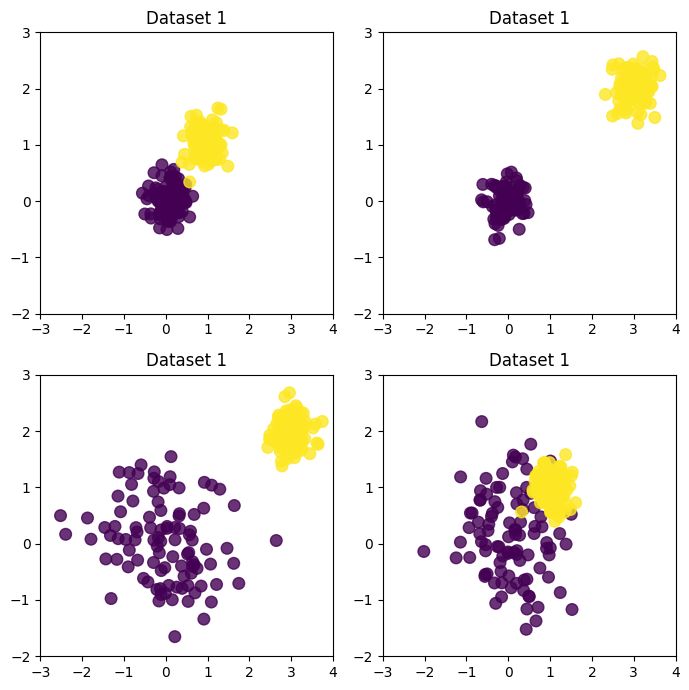

In [31]:
# Setup a plot in which the different sets can be shown and visually compared
fig = plt.figure(figsize=(7,7)) 
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

# This is a Gaussian with center (mean) on the origin, and another one with center on the point (1,1).
# Both of them have standard deviation equal to 0.25
X1d, Y1d= mixGauss([[0,0], [1,1]], [0.25, 0.25], 100)
ax0.set_title("Dataset 1")
ax0.scatter(X1d[:,0], X1d[:,1], s=70, c=Y1d, alpha=0.8)
ax0.set_xlim((-3, 4))
ax0.set_ylim((-2, 3))

# GENERATE 3 FURTHER INSTANCES OF THE DATA KEEPING THE SAME AMOUNT 
#            OF POINTS BUT USING DIFFERENT PARAMETERS FOR THE GAUSSIAN
# DATASET Xd2, Yd2 WITH centers in (0,0) and (3,2) and 0.25 as standard deviations for both
# DATASET Xd3, Yd3 WITH centers in (0,0) and (3,2). The first Gaussian has standard deviation equal to 0.75,
#                  the second one equal to 0.25
# DATASET Xd4, Yd4 WITH centers in (0,0) and (1,1). The first Gaussian has standard deviation equal to 0.75,
#                  the second one equal to 0.25
# VISUALIZE THE OBTAINED POINTS ON DIFFERENT SUBPLOTS

# Fill here...

X2d, Y2d= mixGauss([[0,0], [3,2]], [0.25, 0.25], 100)
ax1.set_title("Dataset 1")
ax1.scatter(X2d[:,0], X2d[:,1], s=70, c=Y2d, alpha=0.8)
ax1.set_xlim((-3, 4))
ax1.set_ylim((-2, 3))


X3d, Y3d= mixGauss([[0,0], [3,2]], [0.75, 0.25], 100)
ax2.set_title("Dataset 1")
ax2.scatter(X3d[:,0], X3d[:,1], s=70, c=Y3d, alpha=0.8)
ax2.set_xlim((-3, 4))
ax2.set_ylim((-2, 3))

X4d, Y4d= mixGauss([[0,0], [1,1]], [0.75, 0.25], 100)
ax3.set_title("Dataset 1")
ax3.scatter(X4d[:,0], X4d[:,1], s=70, c=Y4d, alpha=0.8)
ax3.set_xlim((-3, 4))
ax3.set_ylim((-2, 3))

fig.tight_layout()

## Adding noise to the binary classification dataset

So far no noise have been added to the dataset. Let's add some using the function <b>flibLabels</b> that flips randomly selected labels of a binary classification problem. The use is the following

##### Y_noisy = flipLabels(Y, perc)
where
- <b>Y</b> is the array of labels 
- <b>perc</b> is the percentage of labels to be flipped
- <b>Y_noisy</b> is the array including the flipped labels 

In [32]:
def flipLabels(Y, perc):

    if perc < 1 or perc > 100:
        print("p should be a percentage value between 0 and 100.")
        return -1

    if any(np.abs(Y) != 1):
        print("The values of Ytr should be +1 or -1.")
        return -1

    Y_noisy = np.copy(np.squeeze(Y))
    if Y_noisy.ndim > 1:
        print("Please supply a label array with only one dimension")
        return -1

    n = Y_noisy.size
    n_flips = int(np.floor(n * perc / 100))
    idx_to_flip = np.random.choice(n, size=n_flips, replace=False)
    Y_noisy[idx_to_flip] = -Y_noisy[idx_to_flip]

    return Y_noisy

### Play with the noise in 2D datasets for binary classification
Try and generate different datasets in which all parameters but the amount of noise are fixed. See what happens when you increase the percentage of flipped labels

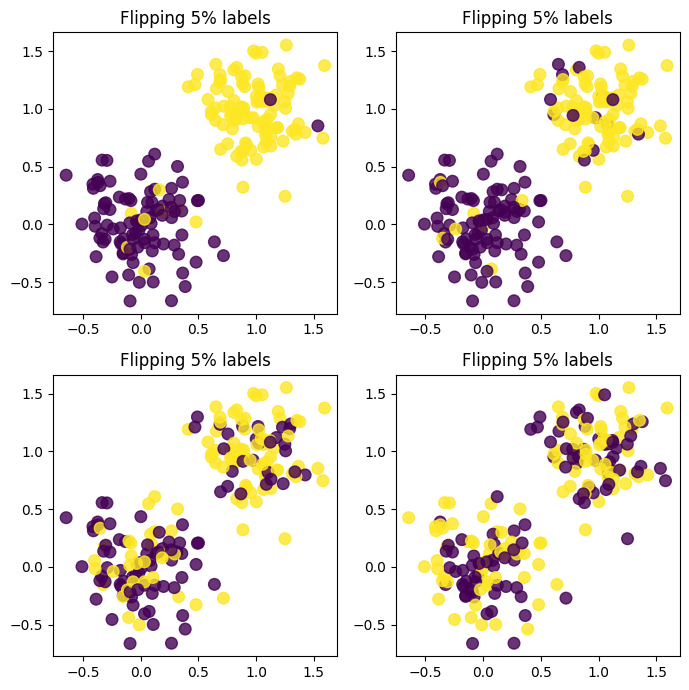

In [33]:
X1, Y1 = mixGauss([[0,0], [1,1]], [0.25, 0.25], 100)

fig = plt.figure(figsize=(7,7)) 
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

Y1_n0 = flipLabels(Y1, 5)
ax0.set_title("Flipping 5% labels")
ax0.scatter(X1[:,0], X1[:,1], s=70, c=Y1_n0, alpha=0.8)


# GENERATE 3 FURTHER INSTANCES OF THE DATA KEEPING THE SAME PARAMETERS FOR ALL BUT 
#       THE PERCENTAGE OF FLIPPED LABELS
# TRY WITH 10%, 30% AND 50% OF FLIPPINGS 
# VISUALIZE THE OBTAINED POINTS ON DIFFERENT SUBPLOTS

# Fill here...

Y2_n0 = flipLabels(Y1, 10)
ax1.set_title("Flipping 5% labels")
ax1.scatter(X1[:,0], X1[:,1], s=70, c=Y2_n0, alpha=0.8)

Y3_n0 = flipLabels(Y1, 30)
ax2.set_title("Flipping 5% labels")
ax2.scatter(X1[:,0], X1[:,1], s=70, c=Y3_n0, alpha=0.8)

Y4_n0 = flipLabels(Y1, 50)
ax3.set_title("Flipping 5% labels")
ax3.scatter(X1[:,0], X1[:,1], s=70, c=Y4_n0, alpha=0.8)

fig.tight_layout()

### Generate a more complex dataset with Gaussians

Let's generate a more complex binary dataset. To do it, follow the instructions below:
- Call the function <i>mixGauss</i> and produce a 2D dataset with 4 classes: the classes must be centered on the corners of the unit square (0,0), (0,1), (1,1), (1,0), and all of them have standard deviation equal to 0.25
- Plot the obtained dataset
- Manipulate the data to obtain a 2-class problem where data on opposite corners belong to the same class with labels +1 and -1. <b>Hint</b>: you can dot that using Ytr=

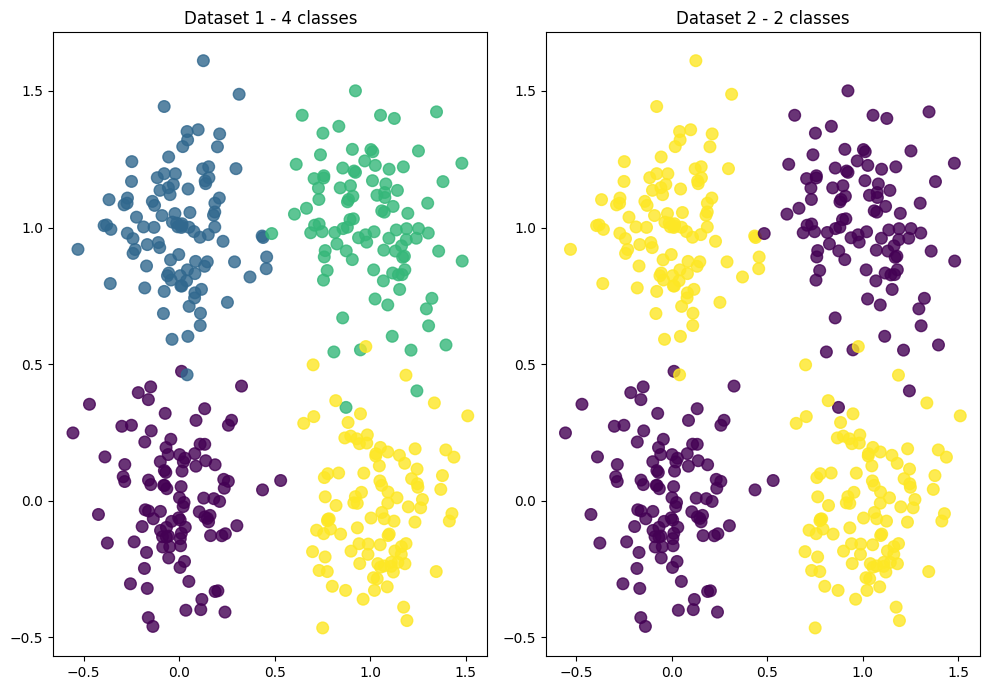

In [34]:
X, Y4= mixGauss([[0,0], [0,1], [1,1], [1,0]], [0.2, 0.2, 0.2, 0.2], 100)

fig = plt.figure(figsize=(10,7)) 
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.set_title("Dataset 1 - 4 classes")
ax0.scatter(X[:,0], X[:,1], s=70, c=Y4, alpha=0.8)

Y2 = 2 * np.mod(Y4, 2) -1

ax1.set_title("Dataset 2 - 2 classes")
ax1.scatter(X[:,0], X[:,1], s=70, c=Y2, alpha=0.8)

plt.tight_layout()


### A different way of generating binary classification problems: using a separator

Let's explore different strategies to generate datasets for binary classification, based on the concept of separators. 

Observe what happens as you change the number of sampled points

(-10.0, 10.0)

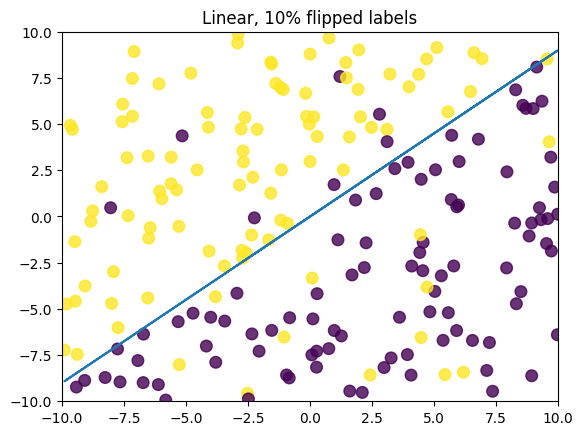

In [35]:
n = 200 # number of points per class
D = 2 # dimension of the points

# linear case
m = 0.9
q = 0

# bounds (assume they are the same for all dimensions)
low_D = -10
high_D = 10

X = np.zeros((n, D))
Y = np.zeros(n)

# sampling of the X
for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)
    
# assigning the labels depending on the position of the sample with respect to the linear separator
Y[X[:,1] - (X[:,0] * m + q) > 0] = 1 
Y[Y==0] = -1

# add some noise
Yn = flipLabels(Y, 10)

# plot the samples and the separator
plt.title("Linear, 10% flipped labels")
plt.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
plt.plot(X[:,0], X[:,0] * m + q)
plt.xlim((low_D, high_D))
plt.ylim((low_D, high_D))
